<a href="https://colab.research.google.com/github/shahd1995913/Large-Pre-Trained-Models-for-Multi-Modal-Reasoning-with-Knowledge-Graph/blob/main/Knowledge_Graph_%E2%86%92_LLM_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Experiment  2**


### **Step 1: Data Collection & Knowledge Graph Construction**

* **Input**: Biological entities and relations (Genes, Proteins, Diseases, Biological Processes).
* **Process**:

  * Nodes represent entities: `Gene`, `Protein`, `Disease`, `Biological_Process`.
  * Directed edges represent relationships: `regulates`, `associated_with`, `interacts_with`, `contributes_to`.
* **Algorithm/Library**: **NetworkX Directed Graph (`DiGraph`)**
* **Output**: `G` → Directed Knowledge Graph with nodes and edges.

---

### **Step 2: Knowledge Graph Visualization**

* **Input**: Directed Knowledge Graph `G`.
* **Process**:

  * Choose **graph layout**: `spring_layout` (force-directed).
  * Assign **node colors** by type for academic clarity.
  * Draw **edges and edge labels** showing relation types.
* **Algorithm/Library**: **Force-directed graph layout**, `matplotlib` for plotting.
* **Output**: Clear, academic-style Knowledge Graph figure.

---

### **Step 3: Graph-to-Text Conversion**

* **Input**: Knowledge Graph `G`.
* **Process**:

  * Traverse all edges.
* **Algorithm**: Simple **graph traversal** (`for u, v, data in G.edges(data=True)`).
* **Output**: `kg_text` → unstructured text ready for LLM input.

---

### **Step 4: Language Model Setup**

* **Input**: Model name (e.g., `gpt2`, `BioGPT-Large`).
* **Process**:

  * Load **pretrained causal language model**.
  * Load **tokenizer** for text → token IDs conversion.
* **Model/Library**: **Hugging Face Transformers** (`AutoTokenizer`, `AutoModelForCausalLM`).
* **Output**: LLM model and tokenizer ready to process KG text.

---

### **Step 5: Prompt Engineering**

* **Input**: `kg_text`.
  * The prompt guides LLM to produce **biological predictions or reasoning**.
* **Output**: `prompt` → formatted text for LLM.

---

### **Step 6: LLM Prediction / Text Generation**

* **Input**: `prompt`
* **Process**:

  * Tokenize prompt → token IDs for model input.
  * Generate text predictions using **sampling-based decoding**:

    * `do_sample=True` → stochastic sampling
    * `top_p=0.9` → nucleus sampling
    * `temperature=0.6` → controls randomness
    * `num_return_sequences=3` → multiple predictions
* **Model/Algorithm**: **GPT-2 or BioGPT**, Transformer-based causal LM.
* **Output**: List of predictions → biological insights / potential new relations.

---

### **Step 7: Output Decoding & Post-processing**

* **Input**: LLM token outputs.
* **Process**:

  * Decode token IDs → readable text.
  * Optionally, filter or summarize repetitive content.
* **Algorithm**: `tokenizer.decode(skip_special_tokens=True)`
* **Output**: Academic-style predictions for biological insights.

---

### **Step 8: (Optional) Feedback Loop / KG Update**

* **Input**: LLM predictions.
* **Process**:

  * Extract new predicted relations.
  * Add them back to the Knowledge Graph.
  * Enables iterative KG enrichment and reasoning.
* **Algorithm**: Graph update / entity-relation extraction.
* **Output**: Updated KG ready for next LLM reasoning cycle.

---

### **Sequential Diagram**

```
Biological Data
      ↓
Knowledge Graph Construction (NetworkX DiGraph)
      ↓
Graph Visualization (matplotlib, spring_layout)
      ↓
Graph → Text Conversion (kg_to_text)
      ↓
LLM Setup (GPT2/BioGPT)
      ↓
Prompt Engineering (Academic KG Prompt)
      ↓
LLM Prediction (Sampling-based Text Generation)
      ↓
Decode & Post-process (tokenizer.decode)
      ↓
Optional: Update KG with new insights
```


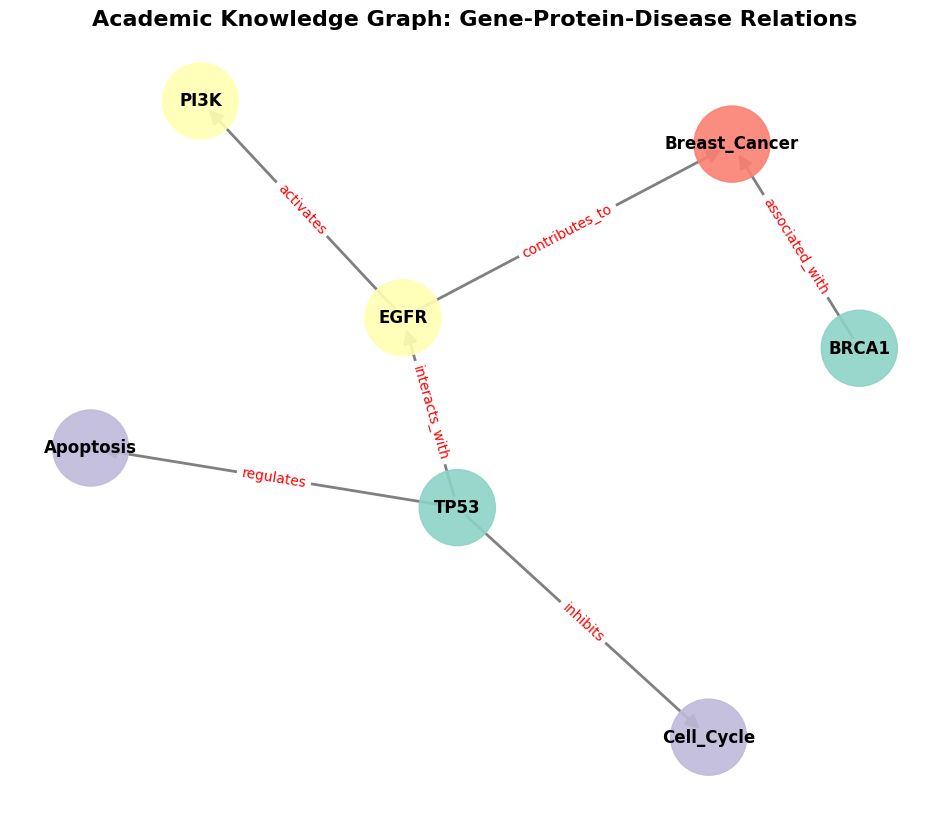

KG Text:
 TP53 regulates Apoptosis. TP53 interacts_with EGFR. TP53 inhibits Cell_Cycle. BRCA1 associated_with Breast_Cancer. EGFR contributes_to Breast_Cancer. EGFR activates PI3K.

LLM Prediction 1:
Given the following scientific knowledge graph information, predict potential biological insights or interactions in an academic manner:
TP53 regulates Apoptosis. TP53 interacts_with EGFR. TP53 inhibits Cell_Cycle. BRCA1 associated_with Breast_Cancer. EGFR contributes_to Breast_Cancer. EGFR activates PI3K.
Prediction:
If the prediction of a predicted biological effect is correct, the prediction of the predicted biological effect is likely to be true. If the prediction of a predicted biological effect is not correct, the prediction of the predicted biological effect is likely to be false.
Prediction:
If the prediction of a predicted biological effect is not correct, the prediction of the predicted biological effect


LLM Prediction 2:
Given the following scientific knowledge graph informati

In [8]:
# -----------------------------------------------
# Install required libraries (uncomment if needed)
# -----------------------------------------------
# !pip install transformers torch networkx matplotlib

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import networkx as nx
import matplotlib.pyplot as plt

# -----------------------------------------------
# 1. Create Academic Knowledge Graph (English)
# -----------------------------------------------
G = nx.DiGraph()

# Define nodes with types
G.add_node("TP53", type="Gene")
G.add_node("BRCA1", type="Gene")
G.add_node("EGFR", type="Protein")
G.add_node("Apoptosis", type="Biological_Process")
G.add_node("Breast_Cancer", type="Disease")
G.add_node("PI3K", type="Protein")
G.add_node("Cell_Cycle", type="Biological_Process")

# Define edges with relation types
G.add_edge("TP53", "Apoptosis", relation="regulates")
G.add_edge("BRCA1", "Breast_Cancer", relation="associated_with")
G.add_edge("EGFR", "Breast_Cancer", relation="contributes_to")
G.add_edge("TP53", "EGFR", relation="interacts_with")
G.add_edge("EGFR", "PI3K", relation="activates")
G.add_edge("TP53", "Cell_Cycle", relation="inhibits")

# -----------------------------------------------
# 2. Plot Knowledge Graph (Academic & Clear)
# -----------------------------------------------
plt.figure(figsize=(12,10))

# Define node colors by type
color_map = {
    "Gene": "#8dd3c7",
    "Protein": "#ffffb3",
    "Biological_Process": "#bebada",
    "Disease": "#fb8072"
}
node_colors = [color_map[G.nodes[n]['type']] for n in G.nodes]

# Use spring layout for clarity and reproducibility
pos = nx.spring_layout(G, seed=42, k=1.2)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=3000, alpha=0.9)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, width=2, edge_color='grey')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Draw edge labels (relations)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

plt.title("Academic Knowledge Graph: Gene-Protein-Disease Relations", fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()

# -----------------------------------------------
# 3. Setup LLM for Knowledge Graph Analysis
# -----------------------------------------------
model_name = "gpt2"  # For demonstration; replace with "microsoft/BioGPT-Large" for real bio predictions
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# -----------------------------------------------
# 4. Convert Knowledge Graph to Text for LLM
# -----------------------------------------------
def kg_to_text(graph):
    """
    Convert a directed knowledge graph into a textual description suitable for LLM input.
    """
    sentences = []
    for u, v, data in graph.edges(data=True):
        sentences.append(f"{u} {data['relation']} {v}.")
    return " ".join(sentences)

kg_text = kg_to_text(G)
print("KG Text:\n", kg_text)

# -----------------------------------------------
# 5. Generate Academic Predictions with LLM
# -----------------------------------------------
prompt = (
    f"Given the following scientific knowledge graph information, "
    f"predict potential biological insights or interactions in an academic manner:\n{kg_text}\nPrediction:"
)

inputs = tokenizer(prompt, return_tensors="pt")

# Generate multiple predictions for diversity, faster execution
outputs = model.generate(
    **inputs,
    max_length=150,
    do_sample=True,
    top_p=0.9,
    temperature=0.6,
    num_return_sequences=3,
    pad_token_id=tokenizer.eos_token_id
)

# Decode and print predictions
for i, out in enumerate(outputs):
    prediction = tokenizer.decode(out, skip_special_tokens=True)
    print(f"\nLLM Prediction {i+1}:\n{prediction}\n")
